In [89]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [90]:
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/PollenImageClassification/USPollen/Pollen400x

/content/gdrive/My Drive/Colab Notebooks/PollenImageClassification/USPollen/Pollen400x


In [ ]:
!ls

'400x American Elm (Ulmus americana) Photo on 7-11-17 at 7.45 PM.jpg'
'400x American Elm (Ulmus americana) Photo on 7-11-17 at 7.45 PM.txt'
'400x American Elm (Ulmus americana) Photo on 7-11-17 at 7.46 PM #2.jpg'
'400x American Elm (Ulmus americana) Photo on 7-11-17 at 7.46 PM #2.txt'
'400x American Elm (Ulmus americana) Photo on 7-11-17 at 7.46 PM.jpg'
'400x American Elm (Ulmus americana) Photo on 7-11-17 at 7.46 PM.txt'
'400x American Elm (Ulmus americana) Photo on 7-11-17 at 7.47 PM #2.jpg'
'400x American Elm (Ulmus americana) Photo on 7-11-17 at 7.47 PM #2.txt'
'400x American Elm (Ulmus americana) Photo on 7-11-17 at 7.47 PM #3.jpg'
'400x American Elm (Ulmus americana) Photo on 7-11-17 at 7.47 PM #3.txt'
'400x American Elm (Ulmus americana) Photo on 7-11-17 at 7.47 PM.jpg'
'400x American Elm (Ulmus americana) Photo on 7-11-17 at 7.47 PM.txt'
'400x American Elm (Ulmus americana) Photo on 7-11-17 at 7.48 PM.jpg'
'400x American Elm (Ulmus americana) Photo on 7-11-17 at 7.48 PM.txt'
'4

In [91]:
import glob
import numpy as np
import os
classes = []
with open("classes.txt","r") as f:
  for line in f.readlines():
    key = line.strip()
    glober = glob.glob("*"+key+"*.jpg")
    classes.append(np.array(glober))

In [127]:

classes[0][0].replace(".jpg",".txt")


'400x Shagbark Hickory (Carya ovata)Shagbark Hickory (Carya ovata)Photo on 12-31-17 at 11.50 AM #2.txt'

In [ ]:
import cv2
width = 512
height = 512 # keep original height
dim = (width, height)
#resized_image = cv2.resize(image, (256, 256))
for i in classes:
  for j in i:
    img = cv2.imread(j, cv2.IMREAD_UNCHANGED)
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    cv2.imwrite(j, resized)
    print(j+" "+repr(img.shape))

400x  Shagbark Hickory (Carya ovata)Photo on 8-8-17 at 1.48 PM.jpg (512, 512, 3)
400x  Shagbark Hickory (Carya ovata)Photo on 8-8-17 at 1.48 PM #6.jpg (512, 512, 3)
400x  Shagbark Hickory (Carya ovata)Photo on 8-8-17 at 1.48 PM #5.jpg (512, 512, 3)
400x  Shagbark Hickory (Carya ovata)Photo on 8-8-17 at 1.48 PM #3.jpg (512, 512, 3)
400x  Shagbark Hickory (Carya ovata)Photo on 8-8-17 at 1.48 PM #4.jpg (512, 512, 3)
400x  Shagbark Hickory (Carya ovata)Photo on 8-8-17 at 1.48 PM #2.jpg (512, 512, 3)
400x  Shagbark Hickory (Carya ovata)Photo on 8-8-17 at 1.47 PM #4.jpg (512, 512, 3)
400x  Shagbark Hickory (Carya ovata)Photo on 8-8-17 at 1.47 PM.jpg (512, 512, 3)
400x  Shagbark Hickory (Carya ovata)Photo on 8-8-17 at 1.47 PM #2.jpg (512, 512, 3)
400x  Shagbark Hickory (Carya ovata)Photo on 8-8-17 at 1.47 PM #5.jpg (512, 512, 3)
400x  Shagbark Hickory (Carya ovata)Photo on 8-8-17 at 1.46 PM.jpg (512, 512, 3)
400x  Shagbark Hickory (Carya ovata)Photo on 8-8-17 at 1.47 PM #3.jpg (512, 512, 3)
4

In [ ]:
#train test split text
traintestsplitval = .8
trainfile = "train.txt"
f2 = open(trainfile,"w+")
testfile = "test.txt"
f = open(testfile,"w+")
for i in classes:
  for j,val in enumerate(i):
    label = val
    #larger train test split val = larger train lower test 
    if j>len(i)*traintestsplitval:
      f.write("img/USPollen/"+label+"\n")
    else:
      f2.write("img/USPollen/"+label+"\n")
f.close()
f2.close()

In [ ]:
count = -1
countArr = []
for i in classes:
  count+=1
  for j in i:
      print(count)
      countArr.append(count)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
12
12
12
12
12
12
12
12
12
12
12
13
13
13
13
13
13
13
13
13
13
13
14
14
14
14
14
14
14
14
14
14
14
14
14
14
15
15
15
15
15
15
15
16
16
16
16
16
16
16
16
16
16
16
16
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
18
18
18
18
18
18
18
19
19
19
19
19
19
19
19
19
19
20
20
20
20
20
20
20
20
20
20
20
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
22
22
22
22
22
22
22
22
22
22
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
24
24
24
24
24
24
24
24
24
24
25
25
25
25
25
25
25
25
25
25
25
26
26
26
26
26
26
26
26
26
26
27
27
27
27
27


Text(0.5, 1.0, 'Histogram of amount of each type of pollen - 46 types')

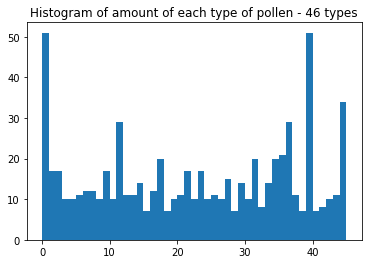

In [ ]:
import matplotlib.pyplot as plt
plt.hist(countArr,bins=range(46))
plt.title("Histogram of amount of each type of pollen - 46 types")

In [132]:
%cd /content
%mkdir pollen 
!ls
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/PollenImageClassification/USPollen/Pollen400x

/content
gdrive	pollen	sample_data
/content/gdrive/My Drive/Colab Notebooks/PollenImageClassification/USPollen/Pollen400x


Save detected images and theyre bounding boxes to a file

In [138]:
import cv2
for i,val in enumerate(classes):
  for j,val2 in enumerate(val):
    numROI = 0
    with open(classes[i][j].replace(".jpg",".txt"),"r") as f:
      for line in f.readlines():
        key = line.strip()
        coords = key.split()
        img = cv2.imread(classes[i][j]+"")
        height, width, channels = img.shape
        x = (float(coords[1])*(width))
        y = (float(coords[2])*(height))
        w = (float(coords[3])*width)
        h = (float(coords[4])*height)
        left = int(x-w/2)
        right = int(x+w/2)
        top = int(y-h/2)
        bot = int(y+h/2)
        crop_img = img[top:bot,left:right]
        cv2.imwrite('/content/pollen/'+repr(numROI)+'+'+classes[i][j], crop_img)
        numROI+=1


saving 0+'400x Shagbark Hickory (Carya ovata)Shagbark Hickory (Carya ovata)Photo on 12-31-17 at 11.50 AM #2.jpg' with coords 740..1237..473..961
saving 0+'400x Shagbark Hickory (Carya ovata)Shagbark Hickory (Carya ovata)Photo on 12-31-17 at 11.51 AM.jpg' with coords 1148..1648..501..1018
saving 0+'400x Shagbark Hickory (Carya ovata)Shagbark Hickory (Carya ovata)Photo on 12-31-17 at 11.51 AM #4.jpg' with coords 936..1405..256..725
saving 0+'400x Shagbark Hickory (Carya ovata)Shagbark Hickory (Carya ovata)Photo on 12-31-17 at 11.51 AM #3.jpg' with coords 351..864..475..932
saving 0+'400x Shagbark Hickory (Carya ovata)Shagbark Hickory (Carya ovata)Photo on 12-31-17 at 11.51 AM #2.jpg' with coords 776..1241..457..933
saving 0+'400x Shagbark Hickory (Carya ovata)Shagbark Hickory (Carya ovata)Photo on 12-31-17 at 11.52 AM.jpg' with coords 1068..1534..303..750
saving 0+'400x Shagbark Hickory (Carya ovata)Shagbark Hickory (Carya ovata)Photo on 12-31-17 at 11.50 AM.jpg' with coords 782..1279..5

In [139]:
!cp -r /content/pollen /content/gdrive/My\ Drive/PollenTest/